In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Olympics (1896-2024).csv to Olympics (1896-2024) (1).csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
Oly = pd.read_csv("Olympics (1896-2024).csv")

In [ ]:
Oly.head()

,Year,Rank,NOC,Gold,Silver,Bronze,Total
0,2024,1,United States,40,44,42,126
1,2024,2,China,40,27,24,91
2,2024,3,Japan,20,12,13,45
3,2024,4,Australia,18,19,16,53
4,2024,5,France,16,26,22,64


In [ ]:
Oly.tail()

,Year,Rank,NOC,Gold,Silver,Bronze,Total
1431,1896,7,Austria,2,1,2,5
1432,1896,8,Australia,2,0,0,2
1433,1896,9,Denmark,1,2,3,6
1434,1896,10,Switzerland,1,2,0,3
1435,1896,11,Mixed team,1,0,1,2


In [ ]:
Oly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1436 non-null   int64 
 1   Rank    1436 non-null   object
 2   NOC     1436 non-null   object
 3   Gold    1436 non-null   int64 
 4   Silver  1436 non-null   int64 
 5   Bronze  1436 non-null   int64 
 6   Total   1436 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 78.7+ KB


In [ ]:
Oly.describe()

,Year,Gold,Silver,Bronze,Total
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,1981.899721,4.053621,4.030641,4.392061,12.476323
std,34.119053,8.411742,7.115310,6.847175,21.641717
min,1896.000000,0.000000,0.000000,0.000000,1.000000
25%,1960.000000,0.000000,0.000000,1.000000,2.000000
50%,1992.000000,1.000000,2.000000,2.000000,5.000000
75%,2008.000000,4.000000,4.000000,5.000000,13.000000
max,2024.000000,83.000000,79.000000,78.000000,234.000000


In [ ]:
Oly.isnull().sum()

,0
Year,0
Rank,0
NOC,0
Gold,0
Silver,0
Bronze,0
Total,0


In [ ]:
Oly.shape

(1436, 7)

In [ ]:
Oly.columns

Index(['Year', 'Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

In [ ]:
Oly.duplicated().sum()

0

In [ ]:
Oly.value_counts()

Year  Rank  NOC                                Gold  Silver  Bronze  Total
1896  1     United States                      11    7       2       20       1
2004  32    Georgia                            2     2       0       4        1
      50    Azerbaijan                         1     0       4       5        1
      5     Japan                              16    9       12      37       1
      49    Zimbabwe                           1     1       1       3        1
                                                                             ..
1972  14    Cuba                               3     1       4       8        1
      13    Romania                            3     6       7       16       1
      12    Great Britain                      4     5       9       18       1
      11    Sweden                             4     6       6       16       1
2024  –     Individual Neutral Athletes[A][B]  1     3       1       5        1
Name: count, Length: 1436, dtype: int64

In [ ]:
Oly.dtypes

,0
Year,int64
Rank,object
NOC,object
Gold,int64
Silver,int64
Bronze,int64
Total,int64


-- EDA --


In [ ]:
Oly['Year'] = Oly['Year'].astype(int)

# Setting color default palette
sns.set_palette('colorblind')

<Figure size 1200x600 with 0 Axes>

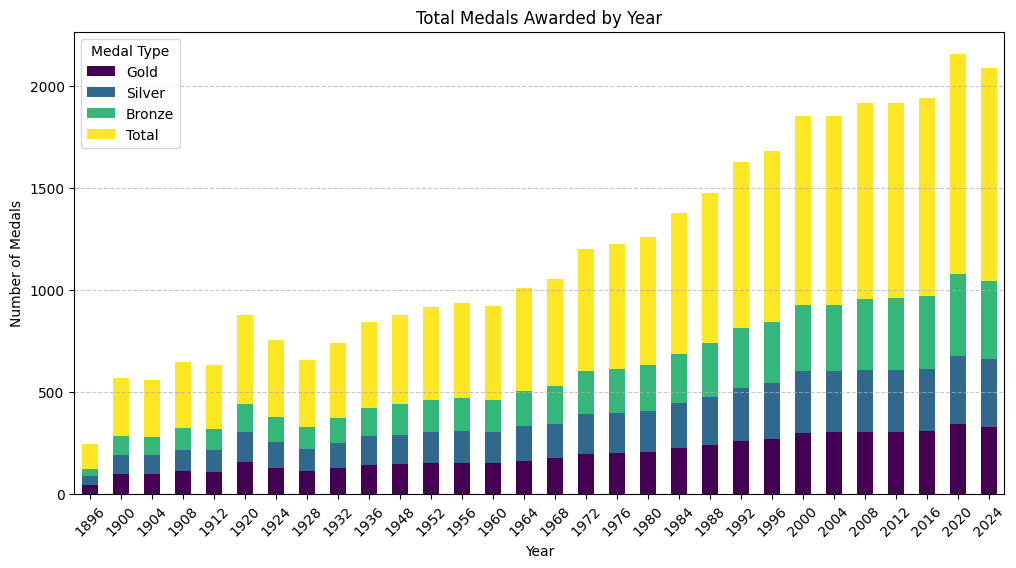

In [ ]:
# Total medal by Year
plt.figure(figsize=(12, 6))
medals_by_year = Oly.groupby('Year')[['Gold', 'Silver', 'Bronze', 'Total']].sum()
medals_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Total Medals Awarded by Year")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend(title="Medal Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<ipython-input-37-4558368a9f43>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




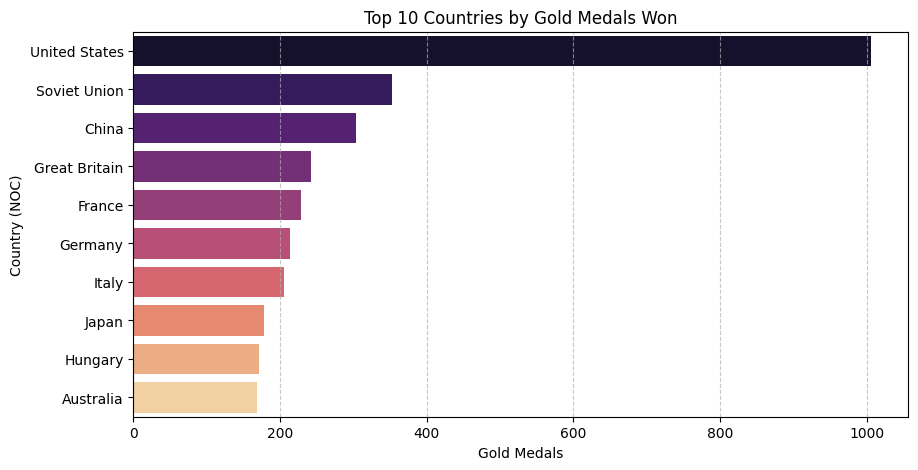

In [ ]:
# Top 10 countries with gold medals
top_countries = Oly.groupby("NOC")["Gold"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries by Gold Medals Won")
plt.xlabel("Gold Medals")
plt.ylabel("Country (NOC)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-41-87ef26537a89>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




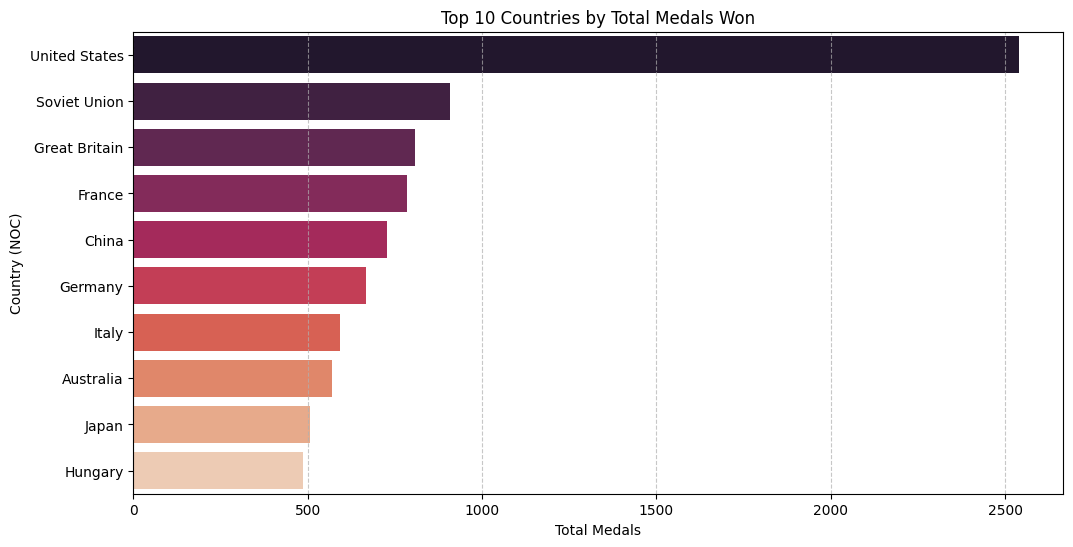

In [ ]:
# Top 10 countries with highest total medals
top_countries_total = Oly.groupby("NOC")["Total"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_total.values, y=top_countries_total.index, palette="rocket")
plt.title("Top 10 Countries by Total Medals Won")
plt.xlabel("Total Medals")
plt.ylabel("Country (NOC)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


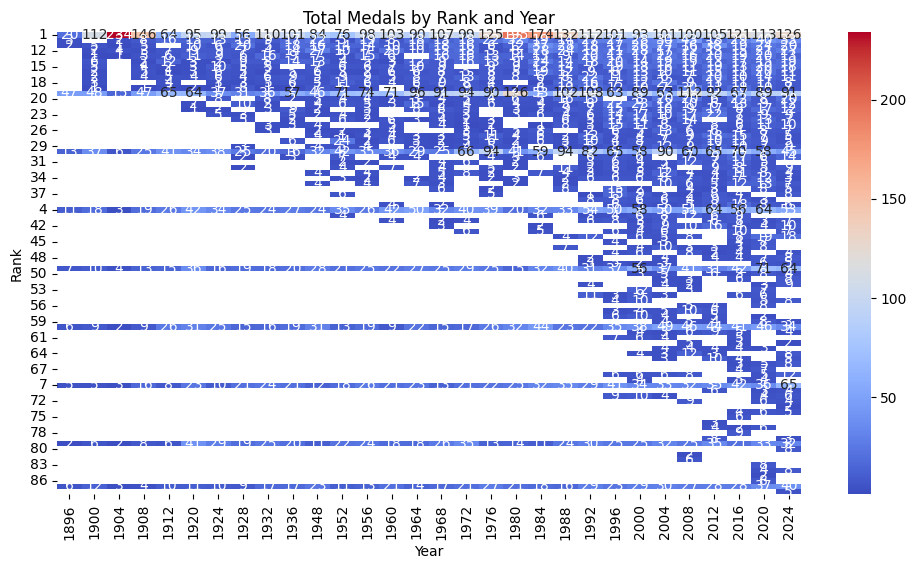

In [ ]:
plt.figure(figsize=(12, 6))

# Aggregate by Rank and Year to avoid duplicates
pivot_df = Oly.groupby(['Rank', 'Year'])['Total'].sum().unstack()

sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Total Medals by Rank and Year")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.show()


<ipython-input-43-579211933afb>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




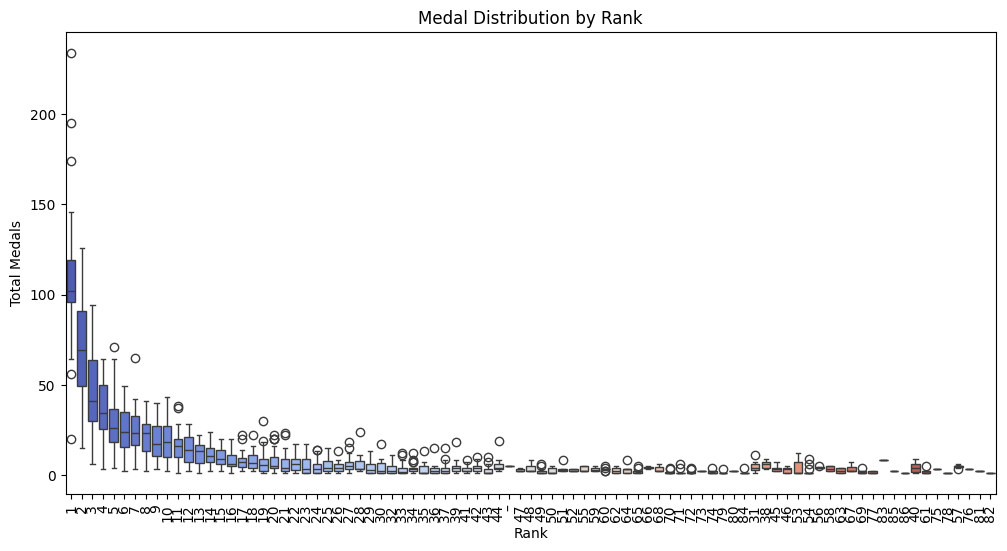

In [ ]:
# Medal Distribution by Rank
plt.figure(figsize=(12, 6))
sns.boxplot(x=Oly['Rank'], y=Oly['Total'], palette='coolwarm')
plt.title("Medal Distribution by Rank")
plt.xlabel("Rank")
plt.ylabel("Total Medals")
plt.xticks(rotation=90)
plt.show()

-- Model Prediction --

In [ ]:
# Import Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(Oly.dtypes)

Year       int64
Rank      object
NOC       object
Gold       int64
Silver     int64
Bronze     int64
Total      int64
dtype: object


In [ ]:
# Converting Year to Numerics
Oly['Year'] = pd.to_numeric(Oly['Year'], errors='coerce')

In [ ]:
# Label encode
label_encoder = LabelEncoder()
Oly['NOC'] = label_encoder.fit_transform(Oly['NOC'])

In [ ]:
# Drop NAN values
Oly = Oly.dropna()

In [ ]:
# Featuring X & Y
X = Oly[['Year', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total']]
Y = Oly['Rank'] # Target variable

In [ ]:
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train-Test-split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# List of ML Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

In [ ]:
results={}

In [ ]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    results[name] = accuracy
    print(f"/n{name} Accuracy: {accuracy:.2f}")
    print(classification_report(Y_test, Y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

/nLogistic Regression Accuracy: 0.04
              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        10
          17       0.02      0.17      0.03         6
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00        10
           2       0.40      0.50      0.44         4
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         5
          23       0.01      0.50      0.02         2
          24       0.00      0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

/nGradient Boosting Accuracy: 0.31
              precision    recall  f1-score   support

           1       0.83      0.71      0.77         7
          10       0.00      0.00      0.00         9
          11       0.20      0.50      0.29         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        10
          15       0.07      0.25      0.11         4
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         6
          19       0.14      0.10      0.12        10
           2       0.50      0.75      0.60         4
          20       0.50      0.20      0.29         5
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         2
          24       0.50      0.18      0.27   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00        11
          25       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         6
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00        11
          25       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Best Model: Decision Tree with Accuracy: 0.3368


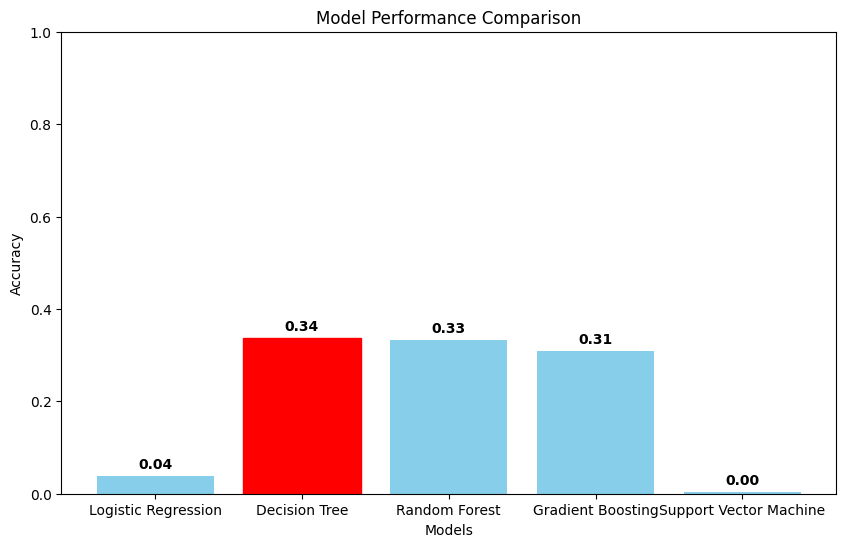

In [ ]:
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue')

# Highlight the best model
bars[list(results.keys()).index(best_model)].set_color('red')

# Customize the plot
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Add accuracy values above each bar
for bar, accuracy in zip(bars, results.values()):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontweight='bold')


plt.show()
